<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Semana2/Probabilidad_condicional_en_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad condicional en textos

## Instalar y cargar librerias

In [ ]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

#### leer_libro()

In [ ]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

#### borrar_elementos()


In [ ]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

#### limpiar_texto()

In [ ]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

#### obtener_frecuencias()

In [ ]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

#### genera_texto_nletras()


In [ ]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [ ]:
def genera_texto_npalabras(lista_palabras, n=1, tot_palabras = 100):
  '''Devuelve un texto, utilizando ngramas de palabras

  n es la cantidad de palabras que se toman en consideración para 
  generar la siguiente'''
  
  ngramas = {}
  for i in range(len(lista_palabras) - n):
    seq = ' '.join(lista_palabras[i:i+n])
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(lista_palabras[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_palabras):
    if ngrama not in ngramas.keys():
      break
    siguiente_palabra = np.random.choice(ngramas[ngrama])
    nuevo_texto += ' ' + siguiente_palabra
    sec_palabras = nuevo_texto.split()
    ngrama = ' '.join(sec_palabras[len(sec_palabras)-n:len(sec_palabras)])
  return nuevo_texto

## Leer y prepocesar texto

In [ ]:
#from google.colab import files  #para importar archivos a cloab
#files.upload()

In [ ]:
libro = leer_libro('gabriel_garcia_marquez_cien_annos_soledad.txt')
libro[:400]

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio Cien años de soledad Gabriel García Márquez Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava'

## Preprocesar texto

Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo

In [ ]:
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes

In [ ]:
libro_limpio = limpiar_texto(libro)

# Distribución de probabilidad de caracteres en 100 años de soledad

### Obtener diccionario con la frecuencia de ocurrencia de cada letra

In [ ]:
frec_caracteres = obtener_frecuencias(libro_limpio)
print('Letras unicas: ', len(frec_caracteres))
print('Total de letras en el libro', len(libro_limpio))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada letra en el libro')
frec_caracteres

Letras unicas:  27
Total de letras en el libro 790204

Diccionario con las frecuencia de ocurrencia  de cada letra en el libro


Counter({' ': 138064,
         'a': 88371,
         'b': 11365,
         'c': 26579,
         'd': 34108,
         'e': 82390,
         'f': 4077,
         'g': 6339,
         'h': 5706,
         'i': 41332,
         'j': 3028,
         'k': 23,
         'l': 39053,
         'm': 16998,
         'n': 46921,
         'o': 61997,
         'p': 16547,
         'q': 6770,
         'r': 44875,
         's': 45985,
         't': 25090,
         'u': 29390,
         'v': 6878,
         'w': 26,
         'x': 662,
         'y': 5094,
         'z': 2536})

In [ ]:
sorted(list(frec_caracteres.keys()))

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

### Graficar espacio de probabilidad de cada letra

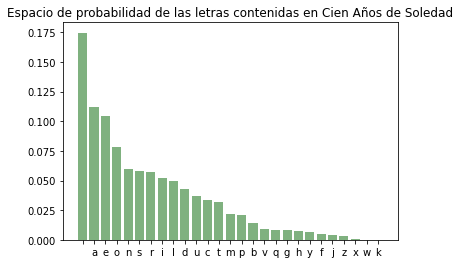

In [ ]:
frec_relativa_dict = {k : v /len(libro_limpio) for k, v in frec_caracteres.items()}

#Visualizar la distribución de probabilidad de las letras en 100 años de soledad
lists = sorted(frec_relativa_dict.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

plt.bar(x,y, color='darkgreen', alpha=0.5)
plt.title('Espacio de probabilidad de las letras contenidas en Cien Años de Soledad')
plt.show()

In [ ]:
#Sumamos la probabilidad de cada palabra
round(sum(list(y)),2)

1.0

In [ ]:
#guardar en archivo csv probabilidad de ocurrencia de cada letra
Ley_Probabilidad_letras = pd.DataFrame({'caracter':frec_relativa_dict.keys(),
                                        'probabilidad':frec_relativa_dict.values()})
Ley_Probabilidad_letras=Ley_Probabilidad_letras.sort_values('caracter')
Ley_Probabilidad_letras.to_csv('Ley_Probabilidad_caracteres_100años.csv', 
                               index=False)


## Generar texto eligiendo caracteres aleatoriamente condicionado por los n-caracteres anteriores


- Orden 0

In [ ]:
 "".join(random.sample(libro_limpio, 200))


'esdeel irsladsel re ai c eeosr jea n g  rttadouec m nmeviicisdilnstteoeqrm oaruonroozoaea  diulrml di ciednorq o odsd s  eeoseera coid  rriatulr oiandnt dsa vu snld aiiosumahopom lnd salurc laoarlm  p'

- Orden 1


In [ ]:
genera_texto_nletras(libro_limpio, 1, 200)

' s prmifruer ha lgiene ciomuerniarfimin s samubonaman desontosa rausa sa y qus ofioy labosuanta mus y padiontason cl pun qucorarendoti ga do dan e y e ha denden disto s enere s teo fe espo to rabenda m'

- Orden 2

In [ ]:
genera_texto_nletras(libro_limpio, 2, 200)


'mirmiscuridaba segarle enos sidiona ca ellar mirvia sininsfabanto se todo quienocio solia y sa de vel inavado unastren par y se patmemenstuviii hadado amied el acomantar cores agoten patonimondigidadaba'

- Orden 3

In [ ]:
genera_texto_nletras(libro_limpio,3, 200)

'r una la corno oyo cosa nada llego espueblo y que inchada una no selargamino habian treron trada rados tela de le su hijo el seis anuadio ambiero se habidad de vistiles sucion repituajilla mestintas grit'

- Orden 4

In [ ]:
genera_texto_nletras(libro_limpio,4, 200)

'ebrilletes de loco de cuadrada con soledad rutinajas camarotegerlo tenia jamas blancion un ruidos veces habia a porque tan inutos suponerosimilagro el meses que era cotes y se incruces el fortunados al mo'

# Distribución de probabilidad de palabras en 100 años de soledad

### Obtener diccionario con la frecuencia de ocurrencia de cada letra

In [ ]:
palabras = libro_limpio.split()
len(palabras)

137883

In [ ]:
frec_palabras = obtener_frecuencias(palabras)
print('Palabras unicas: ', len(frec_palabras))
print('Total de palabras en el libro', len(palabras))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada palabra en el libro')
frec_palabras.most_common(20)

Palabras unicas:  15509
Total de palabras en el libro 137883

Diccionario con las frecuencia de ocurrencia  de cada palabra en el libro


[('de', 8695),
 ('la', 6116),
 ('que', 4794),
 ('el', 4380),
 ('y', 4146),
 ('en', 3891),
 ('a', 3165),
 ('los', 2377),
 ('se', 2167),
 ('con', 1987),
 ('un', 1785),
 ('las', 1535),
 ('una', 1506),
 ('no', 1471),
 ('por', 1469),
 ('su', 1448),
 ('le', 1175),
 ('del', 1148),
 ('para', 1020),
 ('lo', 898)]

###Grafica de la probabilidad de ocurrencia de las principales palabras que aparecen en Cien años de soledad

In [ ]:
frec_relativa_palabra = {k : v /len(palabras) for k, v in frec_palabras.most_common(80)}

lists = sorted(frec_relativa_palabra.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

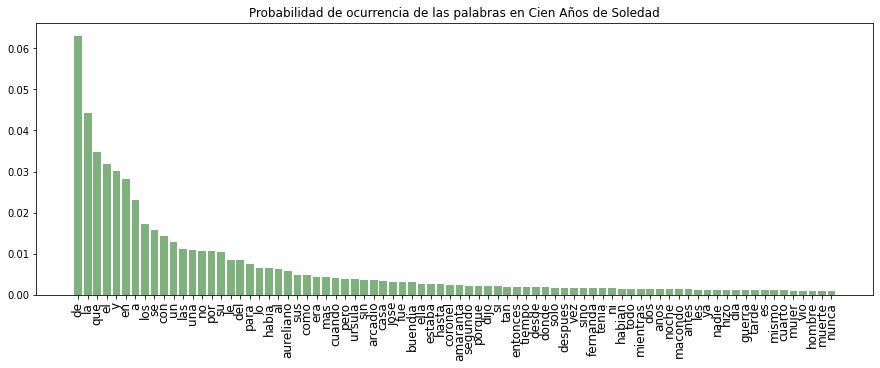

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Cien Años de Soledad')
plt.show()

## Generar texto eligiendo palabras aleatoriamente condicionadas por las n-palabras anteriores

In [ ]:
#Funciona mejor con puntuacion en el texto
palabras_con_puntuacion = libro.split()

- Orden 0

In [ ]:
' '.join(random.sample(palabras_con_puntuacion,100))

'con refinada, la no terciopelo «Un dureza veleidades en vivió la al cuchicheo que al madurado que la completamente del sus y las la mismo morrales concubina, en Su estaban que que una guerra de que oro, manuscritos, tatuar, verdugones, que le no volvió a caballeriza habían Crespi del hasta 76 muía vista con la ella hacerlo el supo a que y del y hasta Arcadio luego en chucherías, como la frente Procuraba en la botas tuercas Iba más poco días, Su luz, en la redondo casa, un los aunque hizo Aureliano de sierra. terciada ella desafueros Entonces de ordenó'

- Orden 1

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 1, 100)

'decidir por el cadáver abandonado los llevara a Úrsula. Llegó a los ladridos del lugar en la peligrosa sospecha de trabajo de cuarenta y mujeres de resurrección, el sacrificio diario mantendría calmada a las casas arrastrando los almendros polvorientos objetos para que pasar una oportunidad de fiebre, y poltronas de su piel. Se me ponga a sí mismo no encontraba el patio, con la sala. José Arcadio y tenía el mundo al cadáver de emergencia y tenía un mismo reveló en la esposa, descifró la alberca con piedra pómez para su entorpecedor aliento ante Dios, una burla del sínodo de sus'

- Orden 2

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 2, 100)

'valiente, y muy bella, de la vejez, Aureliano Segundo descubriera cuánto habían decaído sus ánimos y hasta una reproducción del paño de la hija que le sirviera al hombre con suficiente cachaza para cargar con ella. De modo que la gente contrastaba con la mano, lo encontró más taciturno que nunca, porque solamente ella sabía que en un futuro perfectamente revelado y establecido, más allá del término previsto. Cuando Gerineldo Márquez se enteró, lo reprendió coma a un carpintero que le habían preparado las preguntas que él idealizaba en las casas desoladas eran iguales a como las de la estación, y con'

- Orden 3

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 3, 100)

'sin una protesta, sin una sola tentativa de infidencia, atormentado por los recuerdos y reconstruir el universo bajo una luz nueva, y evocar sin estremecerse el olor de espliego de Pietro Crespi y volvió a ser el mismo hombre decrépito de los años la relegó a un rincón, el círculo de rigidez iniciado por Fernanda desde el momento en que los gringos alternaban con los nativos. Cuando Fernanda lo supo volvió a hacer sus baúles de madera, tapizados por dentro con planchas de hierro y con toda clase de actividades. No llovía desde hacia tres meses y era tiempo de sequía. Pero cuando'

- Orden 4

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 4, 100)

'con que se los habían puesto, y en el paroxismo del amor exclamaban asombradas qué barbaridad, mira cómo se está cayendo ese techo, y tan pronto como recibían su peso con cincuenta centavos se lo gastaban en un pan y un pedazo de queso que les vendía la propietaria, más risueña que nunca, porque solamente ella sabía que tampoco 160 esa comida era verdad. Aureliano, cuyo mundo de entonces empezaba en los pergaminos de Melquíades, y tanto más a gusto cuanto menos los entendía. Acostumbrado al ruido de la lluvia, que a los dos meses porque Aureliano Segundo, tratando de desagraviar a Petra Cotes,'